In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%run ../script/webnlg.py
%matplotlib inline

pd.set_option('max_colwidth', 1000)

import seaborn as sns

In [4]:
DATASETS_FILEPATHS.keys()

dict_keys(['dev', 'train', 'test_no_lex', 'test_unseen_with_lex', 'test_with_lex'])

# Dataset Stats

In [5]:
train = WebNLGCorpus.load(dataset='train')
dev = WebNLGCorpus.load(dataset='dev')
test_no_lex = WebNLGCorpus.load(dataset='test_no_lex')
test_unseen_with_lex = WebNLGCorpus.load(dataset='test_unseen_with_lex')
test_with_lex = WebNLGCorpus.load(dataset='test_with_lex')

datasets = [train, dev, test_no_lex, test_unseen_with_lex, test_with_lex]

In [8]:
datasets_stats = pd.DataFrame({
    'n_entries': [len(ds) for ds in datasets],
    'n_distinct_triples': [ds.mdf.mtext.unique().shape[0] for ds in datasets],
    'n_distinct_lexes': [ds.ldf.ltext.unique().shape[0] if ds.dataset != 'test_no_lex' else 0 for ds in datasets],
    'n_triples': [len(ds.mdf) for ds in datasets]
    }, index=[ds.dataset for ds in datasets])

datasets_stats.loc['Total'] = datasets_stats.sum()

datasets_stats

,n_distinct_lexes,n_distinct_triples,n_entries,n_triples
train,18051,2090,6940,20458
dev,2266,1102,872,2563
test_no_lex,0,2331,1862,5378
test_unseen_with_lex,2430,1068,891,2450
test_with_lex,4922,2331,1862,5378
Total,27669,8922,12427,36227


## Distribution per category and number of triples

In [9]:
def heatmap_by_category_ntriples(ds):
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    sns.heatmap(pd.crosstab(ds.category, ds.ntriples), 
                annot=True,
                ax=ax,
                fmt='d',
                cmap='Blues')

### train

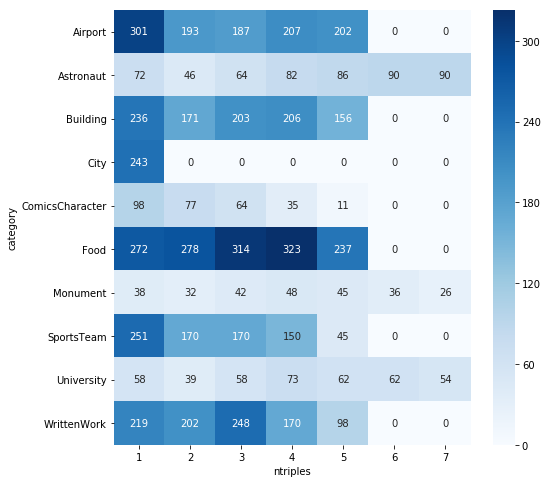

In [10]:
heatmap_by_category_ntriples(train.edf)

### dev

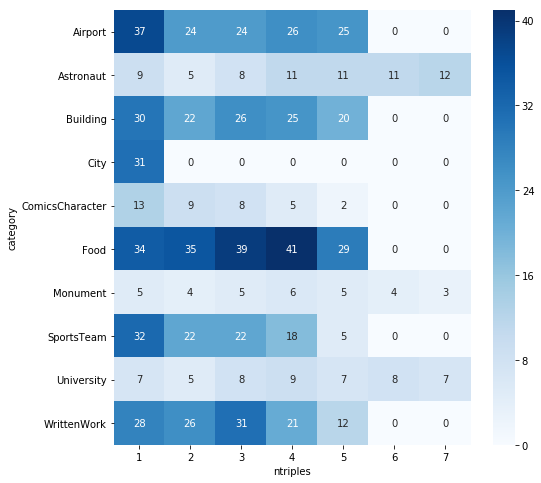

In [11]:
heatmap_by_category_ntriples(dev.edf)

### test_no_lex

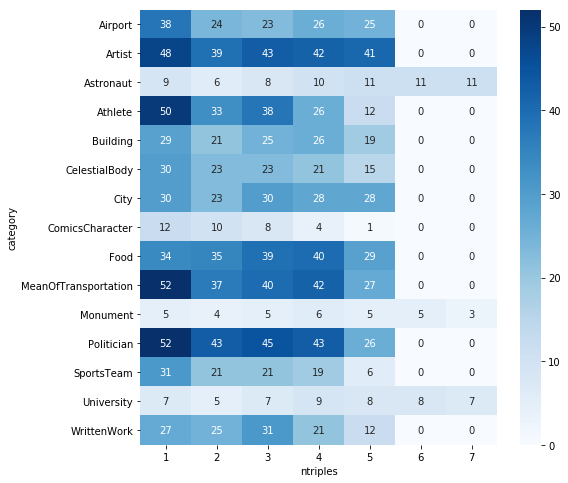

In [12]:
heatmap_by_category_ntriples(test_no_lex.edf)

### test_unseen_with_lex

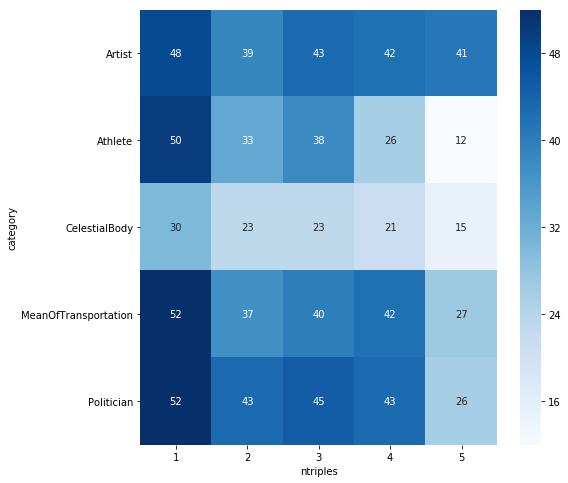

In [13]:
heatmap_by_category_ntriples(test_unseen_with_lex.edf)

# Have a look at a sample

In [14]:
train.sample(category='Astronaut', ntriples=1, random_state=100).mdf.mtext

1675    United_States | leader | Joe_Biden
Name: mtext, dtype: object

In [15]:
dev.sample(category='Astronaut', ntriples=1, random_state=100).mdf.mtext

42    Alan_Shepard | deathPlace | California
Name: mtext, dtype: object

In [16]:
test_no_lex.sample(category='Astronaut', ntriples=1, random_state=100).mdf.mtext

138    Apollo_8 | backup pilot | Buzz_Aldrin
Name: mtext, dtype: object

In [17]:
test_unseen_with_lex.sample(ntriples=1, random_state=100).mdf.mtext

177    Alison_O'Donnell | genre | Jazz
Name: mtext, dtype: object

# Is there any duplicates?

## Is there any modified triple duplicated intra entry?

No

In [18]:
# count how many entries has duplicated mtriples among its mtriples
def is_there_duplicated_mtriples_per_entry(ds):
    
    mtriples_count_per_entry = ds.mdf.groupby(['idx', 'mtext']).size()
    
    return (mtriples_count_per_entry > 1).sum()

### train

In [19]:
is_there_duplicated_mtriples_per_entry(train)

0

### dev

In [20]:
is_there_duplicated_mtriples_per_entry(dev)

0

### test_no_lex

In [21]:
is_there_duplicated_mtriples_per_entry(test_no_lex)

0

### test_unseen_with_lex

In [22]:
is_there_duplicated_mtriples_per_entry(test_unseen_with_lex)

0

## Is there any modified triple duplicated inter entry?

yes

In [23]:
# counts, for each mtriple, in how many entries it occurs
def count_mtriple(ds):
    
    return ds.mdf.mtext.value_counts()

### train

In [24]:
cm_train = count_mtriple(train)
cm_train.describe()

count    2090.000000
mean        9.788517
std        11.838439
min         1.000000
25%         2.000000
50%         6.000000
75%        12.000000
max       111.000000
Name: mtext, dtype: float64

In [25]:
cm_train.head(3)

English_language | spokenIn | Great_Britain    111
United_States | capital | Washington,_D.C.      98
United_States | language | English_language     88
Name: mtext, dtype: int64

### dev

In [26]:
cm_dev = count_mtriple(dev)
cm_dev.describe()

count    1102.000000
mean        2.325771
std         2.014941
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: mtext, dtype: float64

In [27]:
cm_dev.head(3)

Baku_Turkish_Martyrs'_Memorial | location | Azerbaijan               15
Al_Asad_Airbase | operatingOrganisation | United_States_Air_Force    14
United_States | language | English_language                          14
Name: mtext, dtype: int64

### test_no_lex

In [28]:
cm_test_no_lex = count_mtriple(test_no_lex)
cm_test_no_lex.describe()

count    2331.000000
mean        2.307164
std         2.216992
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        39.000000
Name: mtext, dtype: float64

In [29]:
cm_test_no_lex.head(3)

United_States | capital | Washington,_D.C.         39
United_States | ethnicGroup | Asian_Americans      32
United_States | ethnicGroup | African_Americans    28
Name: mtext, dtype: int64

### test_unseen_with_lex

In [30]:
cm_test_unseen_with_lex = count_mtriple(test_unseen_with_lex)
cm_test_unseen_with_lex.describe()

count    1068.000000
mean        2.294007
std         1.641108
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: mtext, dtype: float64

In [31]:
cm_test_unseen_with_lex.head(3)

AIDAstella | operator | AIDA_Cruises                                   10
James_Craig_Watson | deathPlace | Madison,_Wisconsin                    9
United_States | ethnicGroup | Native_Americans_in_the_United_States     9
Name: mtext, dtype: int64

## Are entries with shared triples lexicalized the same way?

There are some patterns...

In [32]:
def mtriples_with_generated_lexes(ds):
    
    df = pd.merge(ds.mdf, ds.ldf)
    
    ddf = df.groupby('mtext').ltext.apply(list).to_frame()
    ddf['size'] = ddf.ltext.apply(len)
    
    return ddf
    
def print_mtriple_with_generated_lexes(mtriple):
    
    print(mtriple.index.values[0], '\n')
    for ltext in mtriple.ltext.tolist()[0]:
        print(ltext, '\n')

### train

In [33]:
mtriples_w_lexes_train = mtriples_with_generated_lexes(train)

mtriples_w_lexes_train_size_lt_5 = mtriples_w_lexes_train[mtriples_w_lexes_train['size'] < 5]

print_mtriple_with_generated_lexes(mtriples_w_lexes_train_size_lt_5.head(1))

11_Diagonal_Street | floorArea | 1200 (square metres) 

11 Diagonal Street has a floor area of 1200 square metres. 

The architect of 11 Diagonal Street is Helmut Jahn and it was completed in 1983. It has 20 floors and a floor area of 1200 square metres. 

11 Diagonal Street was designed by Helmut Jahn and was completed in 1983. It has 20 floors and an area of 1200 square metres. 

Helmut Jahn was the architect of 11 Diagonal Street which was completed in 1983 with 20 floors and a total floor area of 1200 square metres. 



### dev

In [34]:
mtriples_w_lexes_dev = mtriples_with_generated_lexes(dev)

mtriples_w_lexes_dev_size_lt_5 = mtriples_w_lexes_dev[mtriples_w_lexes_dev['size'] < 5]

print_mtriple_with_generated_lexes(mtriples_w_lexes_dev_size_lt_5.head(1))

1._FC_Köln | manager | Peter_Stöger 

Peter Stoger is the manager of FC Kolin. 

Peter Stöger is manager of 1. FC Köln. 

The manager of 1. FC Koln is Peter Stoger. 



### test_with_lex

no, you mustn't see the test data

## Number of distinct subjects, predicates, objects

### for each dataset

In [35]:
def report_n_distinct_s_p_o(mdf):
    
    return {'n_distinct_s': len(mdf.m_subject.unique()),
            'n_distinct_p': len(mdf.m_predicate.unique()),
            'n_distinct_o': len(mdf.m_object.unique()),
            # defined as a subject ou object
            'n_s_o': len(pd.concat([mdf.m_subject, mdf.m_object]).unique()),
            # vocabulary size
            'vocabulary_size': len(pd.concat([mdf.m_subject, mdf.m_object, mdf.m_predicate]).unique())
           }

In [37]:
pd.DataFrame(data = [report_n_distinct_s_p_o(ds.mdf) for ds in datasets],
             index = [ds.dataset for ds in datasets])

,n_distinct_o,n_distinct_p,n_distinct_s,n_s_o,vocabulary_size
train,1619,246,430,1755,2001
dev,918,186,304,1059,1245
test_no_lex,1888,300,575,2125,2425
test_unseen_with_lex,898,159,238,1002,1161
test_with_lex,1888,300,575,2125,2425


### among all datasets

In [38]:
pd.DataFrame(report_n_distinct_s_p_o(pd.concat([ds.mdf for ds in datasets])),
             index=['all'])

,n_distinct_o,n_distinct_p,n_distinct_s,n_s_o,vocabulary_size
all,2505,354,667,2730,3084


## Most frequent subjects, predicates, objects

In [39]:
def most_frequent(ds, type_, n=5):
    
    if type_ == 'subject':
        return ds.mdf.m_subject.value_counts().nlargest(n)
    if type_ == 'object':
        return ds.mdf.m_object.value_counts().nlargest(n)
    if type_ == 'predicate':
        return ds.mdf.m_predicate.value_counts().nlargest(n)

### train

In [40]:
most_frequent(train, 'subject')

United_States                      692
Acharya_Institute_of_Technology    452
Elliot_See                         416
Alan_Shepard                       399
Alan_Bean                          385
Name: m_subject, dtype: int64

In [41]:
most_frequent(train, 'object')

United_States       858
English_language    264
Indonesia           166
Spain               150
Washington,_D.C.    122
Name: m_object, dtype: int64

In [42]:
most_frequent(train, 'predicate')

country       2150
location      1363
leaderName    1227
ingredient     652
isPartOf       573
Name: m_predicate, dtype: int64

### dev

In [43]:
most_frequent(dev, 'subject')

Acharya_Institute_of_Technology    87
Alan_Shepard                       79
United_States                      68
Elliot_See                         58
Buzz_Aldrin                        53
Name: m_subject, dtype: int64

In [44]:
most_frequent(dev, 'object')

United_States       86
English_language    30
Italy               20
India               20
Indonesia           19
Name: m_object, dtype: int64

In [45]:
most_frequent(dev, 'predicate')

country       259
location      174
leaderName    158
ingredient     86
region         80
Name: m_predicate, dtype: int64

### test_unseen_with_lex

In [46]:
most_frequent(test_unseen_with_lex, 'subject')

Aaron_Turner        48
Alison_O'Donnell    45
Andrew_Rayel        42
Albert_B._White     38
ALCO_RS-3           38
Name: m_subject, dtype: int64

In [47]:
most_frequent(test_unseen_with_lex, 'object')

United_States       41
"solo_singer"       31
2006-12-31          24
Rhythm_and_blues    19
AIDA_Cruises        17
Name: m_object, dtype: int64

In [48]:
most_frequent(test_unseen_with_lex, 'predicate')

birthPlace                                224
club                                      158
genre                                     131
associatedBand/associatedMusicalArtist    126
deathPlace                                 73
Name: m_predicate, dtype: int64

# Is tripleset connected?

there is a path between any pair of triples

## Let's check a sample

### non connected example

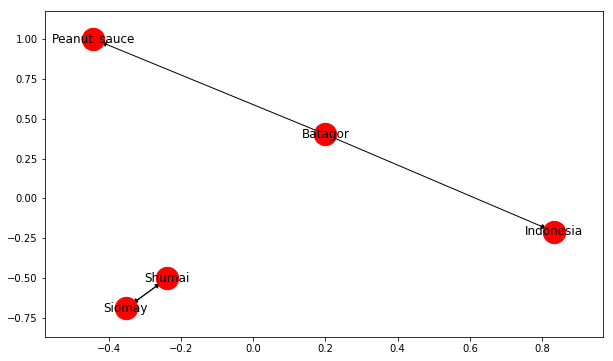

In [49]:
train.sample(idx='25_185').draw_graph()

### connected example

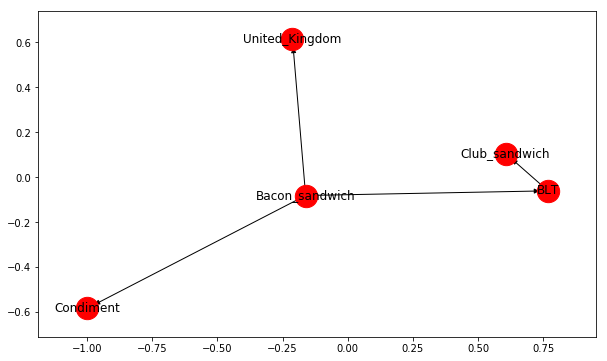

In [50]:
train.sample(idx='25_100').draw_graph()

## Let's check all tripleset

In [51]:
def entries_is_connected_df(mdf):

    is_connected = []

    for idx, entry_group in mdf.groupby('idx'):

        entry_group.reset_index(inplace=True)

        d_g = nx.from_pandas_edgelist(entry_group, 'm_subject', 'm_object', 'm_predicate', create_using=nx.DiGraph())
        u_g = nx.Graph(d_g)

        is_connected.append([idx, nx.is_connected(u_g)])

    is_connected_df = pd.DataFrame(is_connected, columns=['idx', 'is_connected'])
    
    return is_connected_df.is_connected.value_counts()

### train

In [52]:
entries_is_connected_df(train.mdf)

True     6930
False      10
Name: is_connected, dtype: int64

### dev

In [53]:
entries_is_connected_df(dev.mdf)

True     870
False      2
Name: is_connected, dtype: int64

### test_unseen_with_lex

In [54]:
entries_is_connected_df(test_unseen_with_lex.mdf)

True     887
False      4
Name: is_connected, dtype: int64

# Is it possible to determine a 'root' entity?

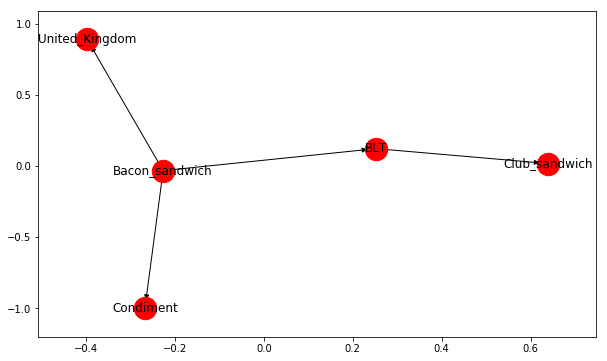

In [55]:
entry = train.sample(idx='25_100')
entry.draw_graph()

In [56]:
sorted(entry.graph.degree, key=lambda x: x[1], reverse=True)

[('Bacon_sandwich', 3),
 ('BLT', 2),
 ('Club_sandwich', 1),
 ('Condiment', 1),
 ('United_Kingdom', 1)]